In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
# Read in the data
happiness2015 = pd.read_csv("2015.csv")
happiness2016 = pd.read_csv("2016.csv")
happiness2017 = pd.read_csv("2017.csv")
happiness2018 = pd.read_csv("2018.csv")
happiness2019 = pd.read_csv("2019.csv")
happiness2015.shape#(158, 12)
happiness2016.shape#(157, 13)
happiness2017.shape#(155, 12)
happiness2018.shape#(156, 9)
happiness2019.shape#(156, 9)

(156, 9)

In [8]:
#Display all the features
happiness_list = [happiness2015,happiness2016,happiness2017,happiness2018,happiness2019]
happiness_d = []
colos= []
    
for item in happiness_list:
    colos.append(item.columns)

for f in range(len(colos)):
    for i in range (len(colos[f])):
        if colos[f][i] not in happiness_d :
             happiness_d.append(colos[f][i])    
happiness_d

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual',
 'Lower Confidence Interval',
 'Upper Confidence Interval',
 'Happiness.Rank',
 'Happiness.Score',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Health..Life.Expectancy.',
 'Trust..Government.Corruption.',
 'Dystopia.Residual',
 'Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Perceptions of corruption']

In [9]:
happiness2015.set_index("Country", inplace=True)

happiness2016.set_index("Country", inplace=True)
happiness2016['Region'] = np.nan 

happiness2017.rename({"Country or region": "Country"}, axis=1, inplace=True)
happiness2017.set_index("Country", inplace=True)
happiness2017['Region'] = np.nan 

happiness2018.rename({"Country or region": "Country"}, axis=1, inplace=True)
happiness2018.set_index("Country", inplace=True)
happiness2018['Region'] = np.nan 

happiness2019.rename({"Country or region": "Country"}, axis=1, inplace=True)
happiness2019.set_index("Country", inplace=True)
happiness2019['Region'] = np.nan 


In [10]:
#add Region to 2017,2018 and 2019
for idx, row in enumerate(happiness2015.itertuples()):
    if row[0] in happiness2016.index.values:
             happiness2016.loc[row[0],"Region"]=row[1]
    if row[0] in happiness2017.index.values:
             happiness2017.loc[row[0],"Region"]=row[1]        
    if row[0] in happiness2018.index.values:
            happiness2018.loc[row[0],"Region"]=row[1]
    if row[0] in happiness2019.index.values:
             happiness2019.loc[row[0],"Region"]=row[1]

In [11]:
noRegion=[]
noRegion.append(happiness2015.Region.isnull().sum(axis = 0))
noRegion.append(happiness2016.Region.isnull().sum(axis = 0))
noRegion.append(happiness2017.Region.isnull().sum(axis = 0))
noRegion.append(happiness2018.Region.isnull().sum(axis = 0))
noRegion.append(happiness2019.Region.isnull().sum(axis = 0))
noRegion #25 missing Regions

[0, 6, 6, 6, 7]

Common Features
1. Region
2. Economy='Economy (GDP per Capita)','Economy..GDP.per.Capita.', 'GDP per capita'
3. Health= 'Health (Life Expectancy)', 'Healthy life expectancy'
4. Trust= 'Trust (Government Corruption)', 'Trust..Government.Corruption.', 'Perceptions of corruption'
5. Social= 'Family','Social support'
6. Freedom='Freedom','Freedom to make life choices'
7. Generosity
8. Year
9. Happiness Score Happiness.Score',Score
10. Happiness Rank=Happiness.Rank','Overall rank'
****
the rest
'Dystopia Residual','Dystopia.Residual'
 'Lower Confidence Interval',
 'Upper Confidence Interval',
 'Whisker.high',
 'Whisker.low',
 'Standard Error'

In [12]:
#rename the Economy columns(all)
happiness2015.rename({"Economy (GDP per Capita)": "Economy"}, axis=1, inplace=True)
happiness2016.rename({"Economy (GDP per Capita)": "Economy"}, axis=1, inplace=True)
happiness2017.rename({"Economy..GDP.per.Capita.": "Economy"}, axis=1, inplace=True)
happiness2018.rename({"GDP per capita": "Economy"}, axis=1, inplace=True)
happiness2019.rename({"GDP per capita": "Economy"}, axis=1, inplace=True)
#rename the Health columns(all)
happiness2015.rename({"Health (Life Expectancy)": "Health"}, axis=1, inplace=True)
happiness2016.rename({"Health (Life Expectancy)": "Health"}, axis=1, inplace=True)
happiness2017.rename({"Health..Life.Expectancy.": "Health"}, axis=1, inplace=True)
happiness2018.rename({"Healthy life expectancy": "Health"}, axis=1, inplace=True)
happiness2019.rename({"Healthy life expectancy": "Health"}, axis=1, inplace=True)
#rename the Trust columns(all)
happiness2015.rename({"Trust (Government Corruption)": "Trust"}, axis=1, inplace=True)
happiness2016.rename({"Trust (Government Corruption)": "Trust"}, axis=1, inplace=True)
happiness2017.rename({"Trust..Government.Corruption.": "Trust"}, axis=1, inplace=True)
happiness2018.rename({"Perceptions of corruption": "Trust"}, axis=1, inplace=True)
happiness2019.rename({"Perceptions of corruption": "Trust"}, axis=1, inplace=True)
#rename the Social Support columns(all)
happiness2015.rename({"Family": "Social Support"}, axis=1, inplace=True)
happiness2016.rename({"Family": "Social Support"}, axis=1, inplace=True)
happiness2017.rename({"Family": "Social Support"}, axis=1, inplace=True)
happiness2018.rename({"Social support": "Social Support"}, axis=1, inplace=True)
happiness2019.rename({"Social support": "Social Support"}, axis=1, inplace=True)
#rename the Freedom columns(all)
happiness2018.rename({"Freedom to make life choices": "Freedom"}, axis=1, inplace=True)
happiness2019.rename({"Freedom to make life choices": "Freedom"}, axis=1, inplace=True)
#rename the Happiness Score columns(all)
happiness2017.rename({"Happiness.Score": "Happiness Score"}, axis=1, inplace=True)
happiness2018.rename({"Score": "Happiness Score"}, axis=1, inplace=True)
happiness2019.rename({"Score": "Happiness Score"}, axis=1, inplace=True)
#rename the Happiness Rank columns(all)
happiness2017.rename({"Happiness.Rank": "Happiness Rank"}, axis=1, inplace=True)
happiness2018.rename({"Overall rank": "Happiness Rank"}, axis=1, inplace=True)
happiness2019.rename({"Overall rank": "Happiness Rank"}, axis=1, inplace=True)
#add a column for the years
happiness2015["Year"] = 2015
happiness2016["Year"] = 2016
happiness2017["Year"] = 2017
happiness2018["Year"] = 2018
happiness2019["Year"] = 2019

#Dystopia Residual(no2018,2019)
happiness2017.rename({"Dystopia.Residual": "Dystopia Residual"}, axis=1, inplace=True)

In [13]:
#explore the data again
happiness_list = [happiness2015,happiness2016,happiness2017,happiness2018,happiness2019]
happiness_d = []
for item in happiness_list:
     print(item.columns)

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy', 'Social Support', 'Health', 'Freedom', 'Trust', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy',
       'Social Support', 'Health', 'Freedom', 'Trust', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Happiness Rank', 'Happiness Score', 'Whisker.high', 'Whisker.low',
       'Economy', 'Social Support', 'Health', 'Freedom', 'Generosity', 'Trust',
       'Dystopia Residual', 'Region', 'Year'],
      dtype='object')
Index(['Happiness Rank', 'Happiness Score', 'Economy', 'Social Support',
       'Health', 'Freedom', 'Generosity', 'Trust', 'Region', 'Year'],
      dtype='object')
Index(['Happiness Rank', 'Happiness Score', 'Economy', 'Social Support',
       'Health', 'Freedom', 'Generosity', 'Trust', 'Region', 'Year'],

In [14]:
happiness_list = [happiness2015,happiness2016,happiness2017,happiness2018,happiness2019]
happiness_d = []
colos= []
    
for item in happiness_list:
    colos.append(item.columns)

for f in range(len(colos)):
    for i in range (len(colos[f])):
        if colos[f][i] not in happiness_d :
             happiness_d.append(colos[f][i])    
happiness_d

['Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy',
 'Social Support',
 'Health',
 'Freedom',
 'Trust',
 'Generosity',
 'Dystopia Residual',
 'Year',
 'Lower Confidence Interval',
 'Upper Confidence Interval',
 'Whisker.high',
 'Whisker.low']

In [15]:
happiness_2015_2019 = pd.concat([happiness2015, happiness2016, happiness2017, happiness2018, happiness2019], join='inner', sort=True)
happiness_2015_2019 = happiness_2015_2019[['Region', 'Year', 'Happiness Score','Happiness Rank', 'Economy', 'Social Support', 'Health', 'Freedom', 'Trust', 'Generosity']]
df=happiness_2015_2019
df

,Region,Year,Happiness Score,Happiness Rank,Economy,Social Support,Health,Freedom,Trust,Generosity
Country,,,,,,,,,,
Switzerland,Western Europe,2015,7.587,1,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
Iceland,Western Europe,2015,7.561,2,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
Denmark,Western Europe,2015,7.527,3,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
Norway,Western Europe,2015,7.522,4,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
Canada,North America,2015,7.427,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,2019,3.334,152,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
Tanzania,Sub-Saharan Africa,2019,3.231,153,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
Afghanistan,Southern Asia,2019,3.203,154,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800


# **change in happiness per year**

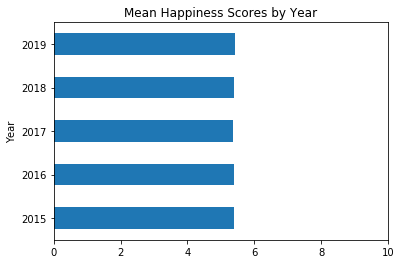

In [16]:
pivot_table_combined_mean = happiness_2015_2019.pivot_table(values='Happiness Score', index='Year')
pivot_table_combined_mean.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10), legend=False)

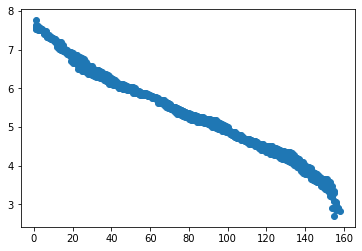

In [17]:
df=happiness_2015_2019
import matplotlib.pyplot as plt
y = df["Happiness Score"]                      
x = df["Happiness Rank"]     
plt.scatter(x, y)
plt.show()

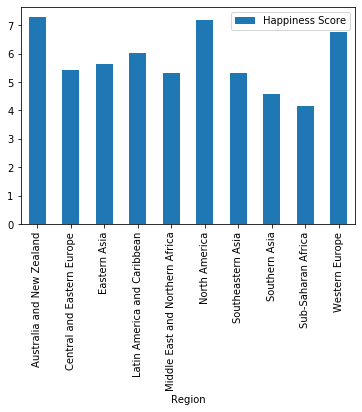

In [18]:
import matplotlib.pyplot as plt
df1=df[["Happiness Score","Region"]]
df1.groupby(['Region']).mean().plot(kind='bar')

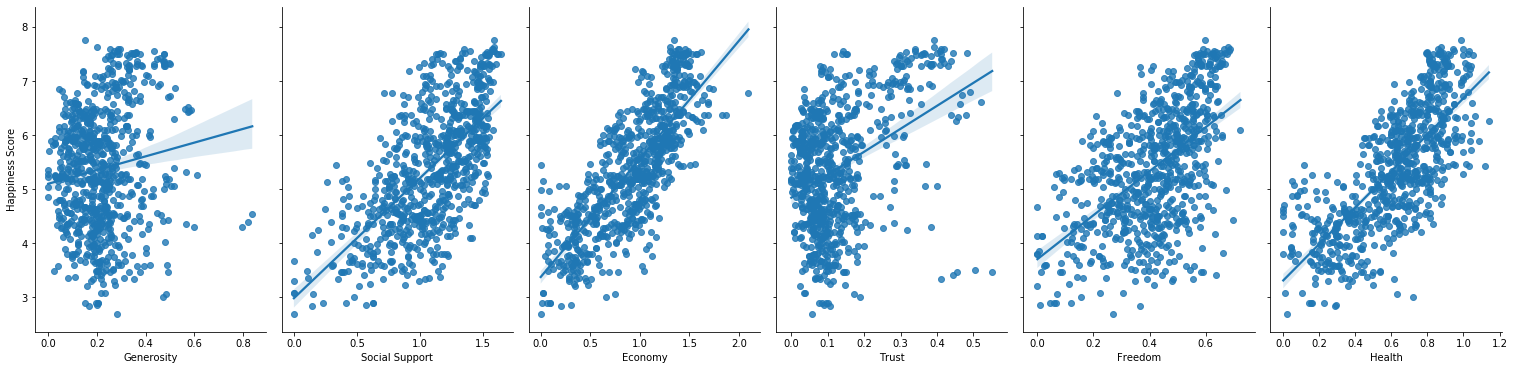

In [19]:
import seaborn as sns
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Generosity','Social Support','Economy','Trust','Freedom','Health'], y_vars='Happiness Score', height=5, aspect=0.7,kind='reg')

In [20]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot, plot
# Creating trace1
trace1 = go.Scatter(
                    y = df["Happiness Score"]   ,                   
                    x = df["Social Support"],
                    mode = "lines",
                    name = "Social Support",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                   , text= df.index.values)

# Creating trace2
trace2 = go.Scatter(
                    x = df["Economy"] ,
                    y = df["Happiness Score"],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)')    
                    ,text= df.index.values)                          
data = [trace1, trace2]
layout = dict(title = 'Social Support  vs Economy on Happiness Score ',
              xaxis= dict(title= 'Happiness_Rank',ticklen= 5,zeroline= False)      
             )
fig = dict(data = data, layout = layout)
iplot(fig)


ModuleNotFoundError: No module named 'plotly'

# Missing Regions

In [ ]:
df.isnull().sum(axis = 0)  

In [ ]:
regions=[]
missingR=[]
for idx, row in enumerate(df.itertuples()):   #row[0]=countries/indecies
    if (pd.isnull(row[1])) :
             regions.append(row[0])

for f in range(len(regions)):
        if regions[f] not in missingR :
             missingR.append(regions[f])    
missingR

In [ ]:
df=happiness_2015_2019

for idx, row in enumerate(df.itertuples()):   #row[0]=countries/indecies
    if (pd.isnull(row[1])) :
        if row[0]=='Puerto Rico':
            df.loc[row[0],"Region"]="Latin America and Caribbean"
        if row[0]=='Belize':
            df.loc[row[0],"Region"]="Latin America and Caribbean"
        if row[0]=='Somalia':
            df.loc[row[0],"Region"]="Sub-Saharan Africa	"
        if row[0]=='Somaliland Region':
            df.loc[row[0],"Region"]="Sub-Saharan Africa"
        if row[0]=='Namibia':
            df.loc[row[0],"Region"]="Sub-Saharan Africa"
        if row[0]=='South Sudan':
            df.loc[row[0],"Region"]="Sub-Saharan Africa"
        if row[0]=='Taiwan Province of China':
            df.loc[row[0],"Region"]="Eastern Asia"
        if row[0]=='Hong Kong S.A.R., China':
            df.loc[row[0],"Region"]="Eastern Asia"
        if row[0]=='Trinidad & Tobago':
            df.loc[row[0],"Region"]="Latin America and Caribbean"
        if row[0]=='Northern Cyprus':
            df.loc[row[0],"Region"]="Central and Eastern Europe"
        if row[0]=='North Macedonia':
            df.loc[row[0],"Region"]="Central and Eastern Europe"
        if row[0]=='Gambia':
            df.loc[row[0],"Region"]="Sub-Saharan Africa"

fill Regions with their mean happiness score

In [ ]:
regionMeanScore=df1.groupby(['Region']).mean()
#regionMeanScore.loc['Australia and New Zealand',:]
regionMeanScore

In [ ]:
cat_map = {  
'Australia and New Zealand':	7.287375,
'Central and Eastern Europe':	5.443548,
'Eastern Asia':	5.632182,
'Latin America and Caribbean':	5.998855,
'Middle East and Northern Africa':	5.325156,
'North America':	7.154875,
'Southeastern Asia'	:5.334286,
'Southern Asia':	4.585000,
'Sub-Saharan Africa':	4.198764,
'Western Europe':	6.778171
}
happiness_2015_2019 = happiness_2015_2019.assign(
    regMean=happiness_2015_2019['Region'].map(cat_map),
    #regMean_class=(nyc_pumpkins['Item Size'].map(cat_map) >= 2).astype(float64)
)

In [ ]:
happiness_2015_2019['Trust'] = happiness_2015_2019['Trust'].fillna((happiness_2015_2019['Trust'].mean()))
happiness_2015_2019.isnull().sum(axis = 0)  

# Missing regMean            

In [ ]:
for idx, row in enumerate(happiness_2015_2019.itertuples()):   #row[0]=countries/indecies
    if (pd.isnull(row[11])) :
             print(row[1])


In [ ]:
happiness_2015_2019['regMean'] = happiness_2015_2019['regMean'].fillna((4.198764))
happiness_2015_2019.isnull().sum(axis = 0)  

# Data Normalization


In [ ]:
features= ['Economy', 'Social Support', 'Health', 'Freedom']#, 'Trust', 'Generosity']

scaler = StandardScaler(copy=False)
scaler.fit(df[features])
X_train_scaled = scaler.transform(df[features])
X_train_scaled

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(norm["Happiness Score"])
# set x/y labels and plot title
plt.pyplot.xlabel("Happiness Score")
plt.pyplot.ylabel("count")

In [ ]:
%matplotlib inline
y = np.log1p(df["Happiness Score"])
plt.pyplot.hist(y)
# set x/y labels and plot title
plt.pyplot.xlabel("log Happiness Score")
plt.pyplot.ylabel("count")

In [ ]:
df=happiness_2015_2019
X=df[['Economy', 'Social Support', 'Health', 'Freedom', 'Trust', 'Generosity','regMean']]
#y=df['Happiness Score']
#X=X_train_scaled
y = np.log1p(df["Happiness Score"])

X_train, X_test,y_train , y_test = train_test_split(X, y, test_size=0.20, random_state=314)


In [ ]:
#lin_reg = LinearRegression()
#lin_reg.fit(X_train, y_train)
#y_pred=lin_reg.predict(X_test)
# RMSE the lowest the best
#print(np.sqrt(metrics.mean_squared_error( y_pred,y_test)))
#print("R2 score =", round(r2_score(y_test, y_pred), 2))# 0.8

In [ ]:
poly_reg2=PolynomialFeatures(degree=4)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

In [ ]:
#predicted_data=lin_reg_3.predict(poly_reg3.fit_transform(X_test))
#print("R2 score =", round(r2_score(y_test, predicted_data), 7))# R2 score = 0.8599107
#with log 0.9070658

In [ ]:
predicted_data=lin_reg_2.predict(poly_reg2.fit_transform(X_test))
print("R2 score =", round(r2_score(y_test, predicted_data), 7))# 0.81
